<a href="https://colab.research.google.com/github/taskswithcode/MLIntro/blob/main/notebooks/DimensionsExplained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the notebook for the video
- [What are the two meanings of 'Dimension' in Machine learning?](https://youtube.com/shorts/rPy8ZbNYoZk) [![Watch](https://raw.githubusercontent.com/taskswithcode/image_assets/main/.github/images/Watch.svg)](https://youtube.com/shorts/rPy8ZbNYoZk)
- [Code walkthrough of this notebook](https://youtu.be/an0WeIGa8CQ) [![Code Walkthrough](https://raw.githubusercontent.com/taskswithcode/image_assets/main/.github/images/walkthrough.svg)](https://youtu.be/an0WeIGa8CQ)


In this notebook, we will clarify the two distinct meanings of the word **Dimension** in the context of machine learning:

1. The first usage of **dimension** refers to an attribute of the data structure used to store data, such as a tensor. A tensor is essentially a multidimensional matrix. The term 'dimension' in this context describes the number of indices required to locate an element within a tensor.
2. The second usage of **dimension** refers to an important property of data itself, often used to describe data that is input into a machine learning model. Here, 'dimension' refers to the number of features that constitute the input data.

_The same term **dimension** is used to describe both the data and the data structure that holds the data. However, the context in which the word is used clarifies its meaning. A few examples will illustrate this_


So lets first download a dataset made up of grayscale image (shades of black) of handwritten digits. This dataset is typically used to train models to classify an image containing a digit.


In [ ]:
!pip install matplotlib scikit-learn

Now lets visualize a few of them

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


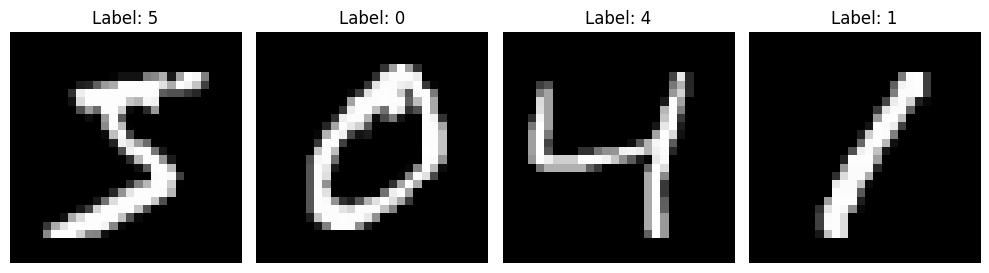

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
images, labels = mnist.data.to_numpy(), mnist.target.to_numpy()

# Reshape images to 28x28
images = images.reshape(-1, 28, 28)

# Selecting the first 4 images and their labels
samples = images[:4]
sample_labels = labels[:4]

# Plotting the images
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(samples[i], cmap='gray')
    plt.title(f'Label: {sample_labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()



Each image is stored in a two-dimensional tensor made up of 28 rows and 28 columns. Each element of this array is a pixel value that ranges from 0 through 255 where 0 represents black, 255 represents white with all numbers in between are shades of gray.

In [ ]:
images, labels = mnist.data.to_numpy(), mnist.target.to_numpy()

# Reshape images to 28x28
images = images.reshape(-1, 28, 28)

# Selecting a single image
single_image = images[0]
image_label = labels[0]

# Print the tensor dimensions of the single image
print("Tensor dimensions of the single image:", single_image.shape)
print("Label for this image:",image_label)
for i in range(28):
  for j in range(28):
    print(single_image[i][j],end=' ')
  print()

print("Dataset size:",len(images))

Tensor dimensions of the single image: (28, 28)
Label for this image: 5
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 3.0 18.0 18.0 18.0 126.0 136.0 175.0 26.0 166.0 255.0 247.0 127.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 30.0 36.0 94.0 154.0 170.0 253.0 253.0 253.0 253.0 253.0 225.0 172.0 253.0 242.0 195.0 64.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 49.0 238.0 253.0 253.0 253.0 253.0 253.0 253.0 253.0 253.0 251.

As mentioned above, each image is stored in a 2-dimensional tensor. It is considered 2-dimensional because two indices are required to access each element within the tensor.

Lets look at the print statement for the tensor holding a single image:

**Tensor dimensions of the single image: (28, 28)**

The output indicates that the shape of the tensor holding a single image is 2-dimensional. It also shows that there are 28 numbers along each dimension or axis. In the context of tensor shapes, each **dimension** is also referred to as an **axis**. For instance, tensor operations implemented in libraries like PyTorch or NumPy refer to each dimension as an axis.

 The second interpretation of 'dimension' refers to an aspect of the data itself, which in this case is the total number of individual pixels in a single image. This image has 784 pixels arranged in 28 rows and 28 columns. Each pixel represents a feature of the input. The phrase **"dimensions of the feature space"** refers to the total number of features of the input. Despite being simple grayscale images, this dataset is considered high-dimensional because it has 784 features.



In summary, from a data structure or storage perspective, we only need a 2-dimensional tensor to store an image. However, this two-dimensional tensor contains high-dimensional data with 784 features where each pixel is a feature.

 _An implication of high-dimensional input data is that the number of possible inputs to a model can be large. For instance, the number of possible images that can be created with 784 features, where each feature can take on 256 values,  is 256^784 or  2^(8*784) which is 2^6272, a figure several orders of magnitude larger than the estimated number of atoms in the universe (approximately 2^266)._

**Back to Tensors...**

Tensors are the backbone data structure of machine learning – they are used to represent input, output, as well as model parameters. Couple of examples to get a feel for tensors.

In [ ]:
import numpy as np

# Creating a two-dimensional array
two_dim_array = np.array([[4, 5, 6],[7,8,9]]) #This tensor is 2 groups of 3 numbers

# Printing the array
print("Two-dimensional array:")
print(two_dim_array)

# Printing the length of axis 0 (rows) and axis 1 (columns)
length_axis_0 = two_dim_array.shape[0]  # Number of rows
length_axis_1 = two_dim_array.shape[1]  # Number of columns

print("\nLength of axis 0 (rows):", length_axis_0)
print("Length of axis 1 (columns):", length_axis_1)

Two-dimensional array:
[[4 5 6]
 [7 8 9]]

Length of axis 0 (rows): 2
Length of axis 1 (columns): 3


In [ ]:
import numpy as np

x = np.array([[0.6733769,  0.74881172, 0.75416955, 0.13230142],
 [0.23387471, 0.43782733, 0.44806045, 0.75545152],
 [0.57339164, 0.01181629, 0.17665073, 0.24029428],
 [0.56351062, 0.89733891, 0.48641948, 0.42417642],
 [0.90163862, 0.97103787, 0.88086453, 0.51607751]]) #This tensor is 5 groups of 4 numbers

print(x.shape)
print(x.shape[0])
print(x.shape[1])

(5, 4)
5
4


**Additional notes:**

This characteristic of the feature space in input modalities such as images, text, and audio, where the number of features is substantially large, is often referred to as the **curse of dimensionality**. A large number of dimensions is considered a curse due to the challenges they pose for training models on such inputs.

- **Model Complexity**: To accurately model the distribution of high-dimensional data,in many cases, an extremely complex model with a vast number of parameters is required. This complexity makes the model challenging to train and increases the risk of overfitting.

- **Data Sparsity**: Despite the immense number of potential images, the actual number of images available for training is finite and often relatively small compared to the space of all possible images. This results in sparsity in the data distribution, with many potential images not being represented in the training set. However, it is also important to note that not all potential images occur naturally. We can leverage this fact to ensure that the training data primarily represents images that naturally occur

- **Computational Constraints**: Handling high-dimensional data demands significant computational resources. Training models on this data can be exceptionally resource-intensive and time-consuming.

- **Assigning Probabilities**: Lastly, assigning probabilities to inputs in high-dimensional data is challenging. Generative models approximate the underlying probability distribution of the input data space, either directly or indirectly. They must learn, or at least approximate, this underlying probability distribution to generate new samples. It's important to note that the immense size of the feature space makes it practically impossible to assign probabilities to each possible image, necessitating the use of approximation methods.

Despite these challenges, in some cases, it is possible to train even simple models to classify digits with high accuracy using the aforementioned dataset. Typically, this is achieved by training a model on a fraction of the 70,000 images and then testing it on the remaining fraction.

In future notebooks, we will explore how to achieve high accuracy in classifying these digits. The models we'll examine are  neural networks, which perform quite well with **high-dimensional data** (in this context, 'dimension' refers to the feature space). They accomplish this by reducing the dimensionality of the input feature space, or in other words, by condensing features.

*It is worth noting that there are approaches to classifying digits without using neural networks. However, they do not scale as well to handle large datasets with high-dimensional inputs compared to neural networks, even though they offer other advantages like interpretability and model simplicity.*